### Bayesian Data Analysis, 3rd ed
##  Chapter 3, demo 5

Demonstrate a normal model for the Newcomb's data (BDA3 p. 66).

In [2]:
from __future__ import division

import os

import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Edit default plot settings (colours from colorbrewer2.org)
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=16)
plt.rc('lines', color='#377eb8', linewidth=2)
plt.rc('axes', prop_cycle=plt.cycler(
        color=['#377eb8','#e41a1c','#4daf4a',
               '#984ea3','#ff7f00','#ffff33']))

In [4]:
# data
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # Here ddof=1 is used to get the sample estimate.
my = np.mean(y)

# filtered data
y_pos = y[y > 0]
# sufficient statistics
n_pos = len(y_pos)
s2_pos = np.var(y_pos, ddof=1)
my_pos = np.mean(y_pos)

In [5]:
# for mu, compute the density in these points
tl1 = [18, 34]
t1 = np.linspace(tl1[0], tl1[1], 1000)

# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# compute the exact marginal density for mu for the filtered data
pm_mu_pos = (
    stats.t.pdf((t1 - my_pos) / np.sqrt(s2_pos/n_pos), n_pos-1)
    / np.sqrt(s2_pos/n_pos)
)

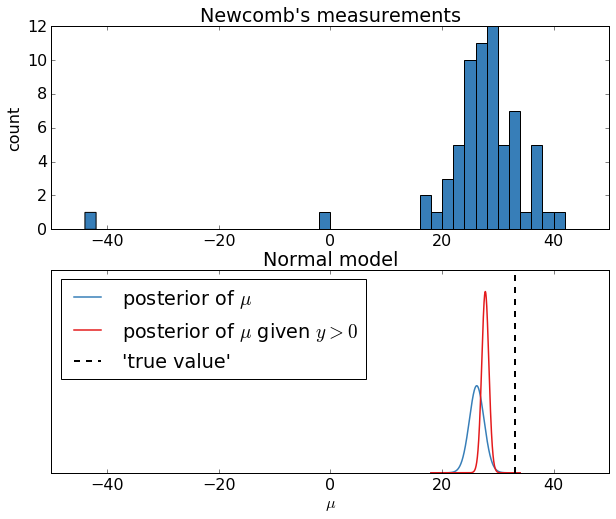

In [13]:
# ====== Plotting

# create figure
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,8))

# plot histogram
axes[0].hist(y, np.arange(-44,43,2))
# decorate
axes[0].set_title('Newcomb\'s measurements')
axes[0].set_ylabel('count')
plt.setp(axes[0].get_xticklabels(), visible=True)

# plot the posterior of mu
axes[1].plot(t1, pm_mu, linewidth=1.5)
# plot the posterior of mu in the filtered case
axes[1].plot(t1, pm_mu_pos, linewidth=1.5)
# Plot the currently accepted true value
axes[1].axvline(33, color='k', linestyle='--')
axes[1].legend(['posterior of $\mu$',
                'posterior of $\mu$ given $y > 0$',
                '\'true value\''], loc='upper left')
axes[1].set_title('Normal model')
axes[1].set_xlabel('$\mu$')
axes[1].set_yticks(());